# CART算法

# 1.算法原理

分类回归树（Classification And Regression Tree，CART），顾名思义，它既能用来分类，也能用来回归；它既能处理离散型的数据，也能处理数值型的数据。它的重要基础包括：

（1）二分(Binary Split)：在每次判断过程中，都是对观察变量进行二分，生成二叉树。

（2）单变量分割(Split Based on One Variable)：每次最优划分都是针对单个变量，即单个特征。

（3）剪枝策略：CART算法的关键点，包括预剪枝（Pre-Pruning）和后剪枝（Pre-Pruning）两种策略，实际应用中常混合使用，以避免过拟合。

# 2.算法分类

（1）分类决策树：处理离散型和数值型数据。若某特征有$n$个属性，那么其二分结果将有$2^{n-1}$种（不包括空集和全集），这将使树分支过于冗杂，因此它不适用于有多属性特征的分类。

（2）回归树：处理连续型特征。结点数据类型为连续性。

（3）模型树：处理连续型特征。结点数据类型为连续性，且非叶结点可解释为划分点、二维向量形式的叶结点可解释为回归方程系数。

回归树和模型树实质上都是分类树。

# 3.算法流程

## （1）决策树主函数

按照CART规则，递归调用，生长出决策树的各个分支节点，并根据终止条件结束算法。

#### a.输入需要分类的数据集和类别标签。

#### b.挑选最佳特征指标，判定最优划分，并创建特征的划分节点。

##### ----Gini指数：

·  对离散型变量，假设有$k$个类，样本属于第k个类的概率为$P_k$, 则此概率分布$p$的基尼指数定义为：$$Gini(p)=\sum\limits_{n=1}^kp_n(1-p_n)=1-\sum\limits_{n=1}^np_n^2$$
对划分为$C_1,\cdots,C_k$类的离散数据集$D$，其基尼指数为：$$Gini(D)=1-\sum\limits_{n=1}^k\frac{|C_k|^2}{|D|}$$
如果样本集$D$根据某个特征是否取某个值$a$来划分为$D_1=\{x\in D|A(x)=a\},D_2=D\setminus D_1$，那么在特征$A$条件下$D$的基尼指数为：$$Gini_A(D)=\frac{|D_1|}{|D|}Gini(D_1)+\frac{|D_!|}{|D|}Gini(D_2)$$
·  对连续型变量，需要将排序后的相邻值的中点作为阈值（分裂点），同样使用上面的公式计算每一个分区不纯度的加权和。

$Gini(D)$与熵类似，$Gini_A(D)$与条件熵类似，都是衡量集合的不确定性。






##### ----最小剩余方差：



在回归树中，数据集均为连续型。连续型数据的处理与离散型数据不同，离散型数据是根据每个特征的不同属性来划分的，二连续型特征则要计算出最优划分点。
假设数据集为$\{x_1,\cdots, x_m\}$。

依次遍历所有特征列的所有属性（在连续性变量场景下，所有属性即当前特征的所有样本点），求特征列$A$的均值$E(A)$和二分数据集后的总方差$Var(A)=D(A)*m$,其中，$D(A)=p(A)(1-p(A))$为$A$的均方差（标准差）。比较即得最优分支特征和最优分支特征值（连续型特征则为划分点的值）。



这里我们选择最小剩余方差，则划分节点需调用$\bf{最小剩余方差函数}$。

#### c.根据最优分支特征将数据集划分为两部分

#### d.根据二份数据的结果构建新左、右节点，作为树生长出的两个分支

#### e.检验是否满足递归终止条件

#### f.将划分的两个新节点包含的数据集和类别标签作为输入，递归执行上述步骤

## （2）使用最小剩余方差函数计算数据集各列的最优划分方差、划分列、划分值

## （3）二分数据集

## （4）剪枝策略

#### a.预剪枝

通过预先设定划分阈值，当节点的划分子集某个标准低于阈值时，子集划分终止。

本文设定两个阈值：最小方差下降值、最小切分样本数。当方差减少量低于最小方差下降值时，停止该节点的划分；当该节点划分出的某一子集中样本数少于最小切分样本数时，停止该节点的划分。

#### b.后剪枝

后剪枝，也称为悲观剪枝。在完全生成的决策树中根据一定规则，剪掉树中不具备一般代表性的子树，使用叶子节点代替，进而形成一棵规模较小的新树。

后剪枝递归估算每个内部节点所覆盖样本节点的误判率，如果某个节点的误判率低于这个值则将其变为叶子节点，该叶子节点的类别标签由原内部节点的最优叶子节点所决定。

若一个叶子节点覆盖了$N$个样本，其中有$E$个错误，则其错误率为$\frac{E+\alpha}{N}$，其中$\alpha=0.5$为惩罚因子。

若一棵子树错误分类一个样本值为1，正确分类一个样本值为0，其误判率$e=\frac{\sum\limits_{i=1}^N E_i+m*\alpha}{\sum\limits_{i=1}^NN_i}$，那么子树的误判次数$m_0$服从伯努利分布，可以估算其均值核标准差：$$E(m_0)=N\times e$$

$$D(m_0)=\sqrt{N\times e\times (1-e)} $$
把子树替换为叶节点之后，该叶子节点的误判次数$m_1$也服从伯努利分布，其误判率$e=\frac{E+\alpha}{N}$，因此均值为$E(m_1)=N\times e$。

本文设定当回归树子树满足以下条件剪枝时剪枝：$$E(m_0)-D(m_0)>E(m_1)$$，本文未对模型树采用后剪枝操作。

# 4.程序实例

（1）部分子函数

In [1]:
import numpy as np
import cPickle as pickle

#------------- 回归树调用函数 ------------- #
# 回归树叶子节点
def regLeaf(DataSet):
    return np.mean(DataSet[:,-1]) # 返回被划分数据集最后一列的均值

# 回归方差
# 返回数据集最后1列的二阶中心距乘以划分数据集的行数
def regErr(DataSet):
    return np.var(DataSet[:,-1]) * np.shape(DataSet)[0]

# 回归树评估: 返回树节点的浮点值     
def regTreeEval(model, inDat):
    return float(model)


#------------- 模型树调用函数 ------------- #  
# 将模型数据格式化为线性函数的自变量X,因变量Y
def linearSolve(dataSet):   #helper function used in two places
    m,n = np.shape(dataSet)
    X = np.mat(np.ones((m,n))); Y = np.mat(np.ones((m,1))) #初始化
    X[:,1:n] = dataSet[:,0:n-1]; Y = dataSet[:,-1] # 为 X,Y 赋值
    xTx = X.T*X
    if np.linalg.det(xTx) == 0.0:
        raise NameError(
        'This np.matrix is np.singular, cannot do inverse,\n\
        try increanp.sing the second value of ops')
    ws = xTx.I * (X.T * Y) # 产生截距和斜率矩阵
    return ws,X,Y # 返回X,Y和线性回归的系数
    
# 产生叶子节点的模型，并返回系数
def modelLeaf(dataSet):
    ws,X,Y = linearSolve(dataSet)
    return ws

# 返回线性模型的预测值与实际值的方差
def modelErr(dataSet):
    ws,X,Y = linearSolve(dataSet)
    yHat = X * ws
    return sum(np.power(Y - yHat,2))

# 模型树评估:Y = X*model
# model为二维向量: 斜率,截距
def modelTreeEval(model, inDat):
    n = np.shape(inDat)[1] # inDat的列数
    X = np.mat(np.ones((1,n+1))) # 全1矩阵,1行,n+1列
    X[:,1:n+1] = inDat 
    return float(X*model) # Y = X*model

（2）CART类

In [2]:
class CART(object):
    def __init__(self):
        self.tree={}
        self.DataSet=[]
        
    def loadDataSet(self,path):
        DataSet = []                
        fp=open(path,"rb")
        for line in fp.readlines():
            curLine = line.strip().split('\t')
            fltLine = map(float,curLine)    # 转换为浮点数
            DataSet.append(fltLine)
        fp.close()
            
    def train(self,method="regression",
              leafType=regLeaf,errType=regErr,ops=(1,4)):
        if method=="model":
            leafType=modelLeaf
            errType=modelErr
        self.tree=self.buildTree(self.DataSet,leafType, errType, ops)

    
    def buildTree(self,dataSet,leafType, errType, ops=(1,4)):
        # 选择最优划分: feat: 划分列, val: 划分值
        # 传递 叶子节点算法函数指针,回归方差算法函数指针,允许的方差下降值,最小切分样本数
        feat,val = self.getBestFeature(dataSet, leafType, errType, ops)
        # 停止条件:如果feat为空,算法停止, 返回叶子节点值
        if feat == None:  	return val 
        retTree = {}
        retTree['spInd'] = feat # 把划分列特征放入创建的树中   
        retTree['spVal'] = val # 把划分值放入创建的树中 
        # 因为是面向过程的编程，判断树的节点级输出有些麻烦,增加调试信息：
        # 输出节点一级的信息,连续输出多少个就有多少层
        # 本算法为先左后右的递归，所以首先输出的是left node，当node输出中断后，
        # 才为另一侧的node
        # print "node:",retTree  
        # 以划分列和元素为分割点二分数据集:
        # dataSet被分为左右两部分：lSet:左子树集合, rSet:右子树集合
        lSet, rSet = self.binSplit(dataSet, feat, val)
        # 递归生成子树
        retTree['left'] = self.buildTree(lSet, leafType, errType,ops)
        retTree['right'] = self.buildTree(rSet, leafType, errType,ops)
    
        return retTree  
 
    # 选取最优特征节点
    def getBestFeature(self,DataSet,leafType, errType,ops=(1,4)):
        tolS = ops[0]; # 允许的方差下降值
        tolN = ops[1] # 最小切分样本数    
        #---- 算法终止条件1开始 ----#
        splitdataSet = set(DataSet[:,-1].T.tolist()[0])
        if len(splitdataSet)==1:   
            return None, leafType(DataSet)   
            # 返回值: leafType(DataSet):树的叶子节点    
        #---- 算法终止条件1结束 ----#
        
        #---- 计算dataSet各列的最优划分方差,划分列,划分值 ----#
        m,n = np.shape(DataSet) # 返回数据集的行数和列数
        S = errType(DataSet)    # 计算整个数据集的回归方差,S
        # 初始化最优参数: 最大方差、最优划分列、最优划分值
        bestS = np.inf; bestIndex = 0; bestValue = 0
        # 按列遍历数据集前n-1列
        # featIndex: 第0~n-1列
        for featIndex in xrange(n-1):
            # 遍历每列去重后的各个类型
            # splitVal:各列的每个类型
            for splitVal in set(DataSet[:,featIndex].T.tolist()[0]):
                # 二元划分数据集:按划分列和划分值分隔dataSet
                mat0, mat1 = self.binSplit(DataSet, featIndex, splitVal)
                # mat0的行数 小于 tolN 或 mat1的行数 小于 tolN
                if (np.shape(mat0)[0] < tolN) or (np.shape(mat1)[0] < tolN): 
                    continue # 终止后面的程序,进行下一次循环
                # mat0的回归方差+mat1的回归方差	
                newS = errType(mat0) + errType(mat1)
                # 如果newS小于bestS
                if newS < bestS: 
                    bestIndex = featIndex # 最优索引 <- 特征索引
                    bestValue = splitVal # 最优值 <- 分割值
                    bestS = newS # bestS <- newS            
        #---- DataSet的最优划分参数：方差、划分列、划分值计算结束 ----#
        
        #---- 算法终止条件2开始:返回的是值节点类型 ----#  
        # 如果(S - bestS) 小于 1
        if (S - bestS) < tolS: 
            # print "stop 2"
            # 返回值: feat==None,leafType(dataSet):数据集标签集的均值   
            return None, leafType(DataSet) 
        #---- 算法终止条件2结束 ----#
        
        #---- 算法终止条件3开始 ----#        
        # 二元划分数据集:按划分列和划分值分隔dataSet
        mat0, mat1 = self.binSplit(DataSet, bestIndex, bestValue)
        # mat0的行数小于 tolN 或 mat1的行数小于tolN 
        if (np.shape(mat0)[0] < tolN) or (np.shape(mat1)[0] < tolN):       
        	# print "stop 3"
        	return None, leafType(DataSet) 
        #---- 算法终止条件3结束 ----#  
        # 算法终止的前3个条件的划分列为None,说明为叶子节点,本枝分类树划分结束 
        
        #---- 算法终止条件4开始:返回的是子树节点类型 ----#
        # print "stop 4"  
        # 返回最优特征的划分列和划分值,但回归树还需递归划分   
        return bestIndex,bestValue 
        #---- 算法终止条件4结束 ----#   
   
        
    # 保存，读取决策树
    def saveTree(self,inputTree,filename):
        f=open(filename,"w")
        pickle.dump(inputTree,f)
        f.close()
        
    def getTree(self,filename):
        f=open(filename)
        return pickle.load(f)  
    
    # 二分数据集
    def binSplit(self,dataSet,feature,value):
        
        mat0=dataSet[np.nonzero(dataSet[:,feature]>value)[0],:]
        
        mat1=dataSet[np.nonzero(dataSet[:,feature]<=value)[0],:]
        return mat0,mat1

    # 判断是否为树,验证输入数据是否为字典
    def isTree(self,obj):
        return (type(obj).__name__=='dict')
    
    # 计算树叶子节点的均值
    def getmean(self,tree):
        # 左、右子树递归至叶子节点处		
        if self.isTree(tree['right']): 
            tree['right'] = self.get.mean(tree['right'])
        if self.isTree(tree['left']): 
            tree['left'] = self.get.mean(tree['left'])
        # 返回叶子节点的均值    	
        return (tree['left']+tree['right'])/2.0
    
    # 树的后剪枝
    # testData: 测试集    
    def prune(self,testData):
        self.tree=self.Prune(self.tree,testData)
        
    def Prune(self,tree, testData):       
        if np.shape(testData)[0] == 0: 
            return self.getmean(tree) 
            # 如果没有测试数据输入,运行getmean,程序退出
        # 如果左、右子节点是树    
        if (self.isTree(tree['right']) or self.isTree(tree['left'])):
            # 对测试集按划分列和树的划分值进行二元分割          
            lSet, rSet = self.binSplit(testData, 
                                       tree['spInd'], tree['spVal'])
        if self.isTree(tree['left']): 
            tree['left'] = self.Prune(tree['left'], lSet) 
            # 如果左节点是树，对测试集递归剪枝
        if self.isTree(tree['right']): 
            tree['right'] =  self.Prune(tree['right'], rSet) 
            # 如果右节点是树，对测试集递归剪枝 
        # 如果左右节点都不是树
        if not self.isTree(tree['left']
                          ) and not self.isTree(tree['right']):
            lSet, rSet = self.binSplit(
                testData, tree['spInd'], tree['spVal']) 
                # 对测试集按划分列和划分值进行二元分割
            # 计算左右子树的方差
            errorNoMerge = sum(np.power(lSet[:,-1] - tree['left'],2)) 
                + sum(np.power(rSet[:,-1] - tree['right'],2))
            # 执行合并：树节点均值
            treemean = (tree['left']+tree['right'])/2.0
            # 计算合并的方差
            errorMerge = sum(np.power(testData[:,-1] - treemean,2))
            # 如果合并后的方差小于不合并方差
            if errorMerge < errorNoMerge: 
                # print "merging"
                return treemean  # 返回节点均值,执行合并
            else: return tree # 否则直接返回,不进行合并
        else: return tree
        
    # 树预测
    # tree:回归树，模型树
    # inData:第i行的测试集向量 
    # modelEval:与树一致的评估函数
    def treeForeCast(self,tree, inData,modelEval=regTreeEval):
        # 如果不是树直接返回评估结果
        if not self.isTree(tree): return modelEval(tree, inData)
        # 如果inData[划分列]的取值大于tree[划分值]
        if inData[tree['spInd']] > tree['spVal']:
            # 如果tree的左子树是一颗树,而不是叶子节点 递归调用本函数
            if self.isTree(tree['left']): 
                return self.treeForeCast(tree['left'], inData,modelEval)
            # 否则返回叶子节点对应评估函数的评估值
            else: return modelEval(tree['left'], inData)
        else: # 如果inData[划分列]的取值小于等于tree[划分值]
            # 如果tree的右子树是一颗树,而不是叶子节点,递归调用本函数        
            if self.isTree(tree['right']): 
                return self.treeForeCast(tree['right'], inData,modelEval )
            # 否则返回叶子节点对应评估函数的评估值        
            else: return modelEval(tree['right'], inData)
        exit(-1)
        
    # 创建预测
    # tree: 回归树，模型树 
    # testData: 测试集 
    # modelEval: 评估函数 regTreeEval,modelTreeEval     
    def createForeCast(self,tree, testData,modelEval=regTreeEval):
        m=len(testData)
        yHat = np.mat(np.zeros((m,1))) # 初始化为全0向量,行数为m
        for i in range(m):
            yHat[i,0] = self.treeForeCast(tree, np.mat(testData[i]),modelEval)
        return yHat

（3）调用、测试及评价

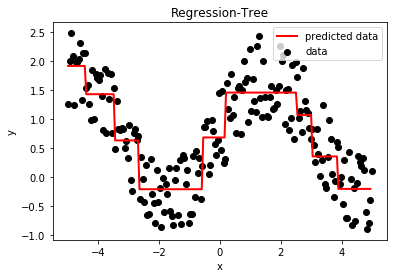

correlation coefficient of Regression-Tree
[[ 1.          0.87470643]
 [ 0.87470643  1.        ]]


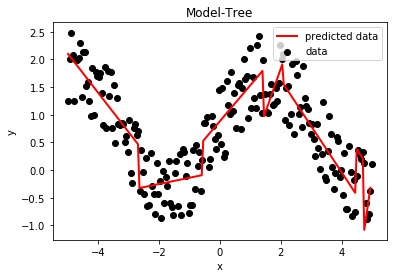

correlation coefficient of Model-Tree
[[ 1.          0.87985832]
 [ 0.87985832  1.        ]]


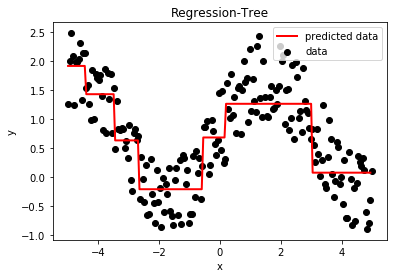

correlation coefficient of Regression-Tree
[[ 1.          0.85571759]
 [ 0.85571759  1.        ]]


In [3]:
t1=CART()
t2=CART()
x=np.linspace(-5,5,200)
siny=np.sin(x)

y=siny+np.random.rand(1,len(siny))*1.5

x=x.tolist()
y=y.tolist()[0]
a=[x,y]
a=np.mat(a).T
t1.DataSet=a
t2.DataSet=a

t1.train("regression")
X_test=np.arange(-5.0,5.0,0.05)[:,np.newaxis]
yp_regressionTree= t1.createForeCast(t1.tree,X_test)

t2.train("model")
X_test=np.arange(-5.0,5.0,0.05)[:,np.newaxis]
yp_modelTree= t2.createForeCast(t2.tree,X_test,modelTreeEval)


# 定性比较、定量比较
import matplotlib.pyplot as plt

def plotfigure(X,X_test,y,yp,kind):
    plt.figure()
    plt.scatter(X,y,c="k",label="data")
    plt.plot(X_test,yp,c="r",label="predicted data",linewidth=2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(kind)
    plt.legend()
    plt.show()

plotfigure(x,X_test,y,yp_regressionTree,"Regression-Tree")  
print "correlation coefficient of Regression-Tree\n"
print np.corrcoef(yp_regressionTree,y,rowvar=0)

plotfigure(x,X_test,y,yp_modelTree,"Model-Tree")  
print "correlation coefficient of Model-Tree\n"
print np.corrcoef(yp_modelTree,y,rowvar=0)

x_prune=np.arange(-5.0,5.0,0.04)[:,np.newaxis]
t1.prune(x_prune)
yp_regressionTree= t1.createForeCast(t1.tree,X_test)
plotfigure(x,X_test,y,yp_regressionTree,"Regression-Tree")  
print "correlation coefficient of Regression-Tree\n",np.corrcoef(yp_regressionTree,y,rowvar=0)
